In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.tree import DecisionTreeRegressor

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from analysis import get_feature_importances, visualize_decision_trees, get_vif, wl_accuracy, season_record, runs_per_game

In [2]:
version = 6
df = pd.read_csv(f'./data/baseball/training/game_data_v{version}.csv')

In [3]:
# create the appropriate training and testing data based on home/away, dropping columns as needed
def create_data(drop_cols=['away_score', 'home_score', 'away_team', 'home_team'], y_col='away_score', split_by='random'):
    y = df[y_col]
    x = df.drop(drop_cols, axis=1)

    if split_by == 'season':
        x_train, x_test = x.iloc[0:13047], x.iloc[13047:]
        y_train, y_test = y.iloc[0:13047], y.iloc[13047:]
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)
    
    return x_train, x_test, y_train, y_test

In [4]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(y_col='home_score', split_by='season')

In [5]:
def generate_random_results():
    results = {'away_pred': [], 'home_pred': [], 'away_true': y_test_away, 'home_true': y_test_home}
    
    for i in range(len(y_test_away)):
        results['away_pred'].append(random.randint(0, 1))
        results['home_pred'].append(1 - results['away_pred'][i])
    
    return pd.DataFrame(results)

In [7]:
results = generate_random_results()

print('RANDOM GUESSING MODEL')
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)

RANDOM GUESSING MODEL
Accuracy: 49.4238683127572%
------------------------------
Season records:
MIA: 94-68	CIN: 92-70	KC: 89-73	NYY: 89-73	OAK: 89-73	
TB: 89-73	SD: 87-75	DET: 87-75	CWS: 85-77	PIT: 84-78	
HOU: 83-79	AZ: 82-80	NYM: 82-80	WSH: 82-80	PHI: 82-80	
CHC: 81-81	MIN: 81-81	CLE: 81-81	LAD: 79-83	TOR: 78-84	
LAA: 78-84	ATL: 77-85	BAL: 76-86	SF: 76-86	SEA: 74-88	
TEX: 73-89	STL: 72-90	BOS: 72-90	MIL: 68-94	COL: 68-94	


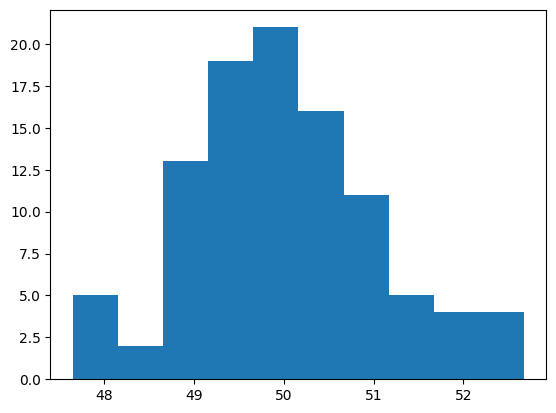

                0
count  100.000000
mean    49.992593
std      1.079753
min     47.654321
25%     49.290123
50%     49.917695
75%     50.555556
max     52.674897


In [9]:
acc = []

for i in range(100):
    results = generate_random_results()
    acc.append(wl_accuracy(results))

plt.hist(acc)
plt.show()

print(pd.DataFrame(acc).describe())